In [1]:
import geopandas as gpd

# Read the GeoPackage file
file_path = "Asentamientos humanos 2/Polígonos/Nuevos/Educación/CELDAS.gpkg"
gdf = gpd.read_file(file_path)

# Display the first few rows of the GeoDataFrame
gdf.head()

,cell_id,smod,pop_1975,pop_1980,pop_1985,pop_1990,pop_1995,pop_2000,pop_2005,pop_2010,pop_2015,pop_2020,polygon_id,geometry
0,00001,urban_cluster,773.876615,1497.169295,2214.783282,2936.382639,3759.680520,4684.930881,5639.160211,6578.468722,7511.420150,8490.616181,02559-1-1,"POLYGON ((-7947000 -689000, -7947000 -688000, ..."
1,00002,rural,127.349266,262.085135,409.920769,567.952579,738.324368,919.774243,1098.632136,1267.729462,1431.649299,1602.712228,07918-1-1,"POLYGON ((-7947000 -659000, -7947000 -658000, ..."
2,00003,rural,128.605609,273.402513,435.992956,620.728641,817.119036,1023.953282,1225.916293,1414.747791,1594.882633,1782.108802,06180-1-1,"POLYGON ((-7946000 -700000, -7946000 -699000, ..."
3,00004,rural,127.938058,263.618495,410.432105,568.264752,735.777852,912.002276,1085.084391,1247.965492,1404.004588,1565.974205,06180-1-1,"POLYGON ((-7946000 -699000, -7946000 -698000, ..."
4,00005,urban_cluster,176.856075,356.591034,548.408754,750.600224,1013.627816,1348.696712,1691.794096,2031.490143,2367.579627,2713.444995,02559-1-1,"POLYGON ((-7946000 -691000, -7946000 -690000, ..."


In [4]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37673 entries, 0 to 37672
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cell_id     37673 non-null  object  
 1   smod        37673 non-null  object  
 2   pop_1975    37673 non-null  float64 
 3   pop_1980    37673 non-null  float64 
 4   pop_1985    37673 non-null  float64 
 5   pop_1990    37673 non-null  float64 
 6   pop_1995    37673 non-null  float64 
 7   pop_2000    37673 non-null  float64 
 8   pop_2005    37673 non-null  float64 
 9   pop_2010    37673 non-null  float64 
 10  pop_2015    37673 non-null  float64 
 11  pop_2020    37673 non-null  float64 
 12  polygon_id  37673 non-null  object  
 13  geometry    37673 non-null  geometry
dtypes: float64(10), geometry(1), object(3)
memory usage: 4.0+ MB


In [5]:
gdf.crs

<Projected CRS: ESRI:54009>
Name: World_Mollweide
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mollweide
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
gdf_epsg_4326 = gdf.to_crs("EPSG:4326")

In [11]:
gdf_epsg_4326.to_parquet("outputs/celdas.parquet", index=False)

In [12]:
import urbanpy as up

/Users/claudio/Documents/bid-amazonia-pop-centers/.venv/lib/python3.12/site-packages/stringcase.py:247: SyntaxWarning: invalid escape sequence '\W'
  return re.sub("\W+", "", string)
/Users/claudio/Documents/bid-amazonia-pop-centers/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
lima = up.download.nominatim_osm("Lima, Peru", 2, email="claudio@autodash.org")

In [ ]:
huancabamba = up.download.nominatim_osm(
    "Huancabamba, Peru", 0, email="claudio@autodash.org"
)

In [24]:
huancabamba.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

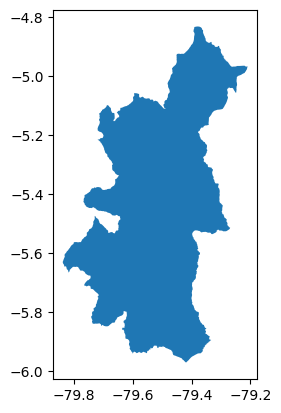

In [25]:
huancabamba.plot()

In [26]:
celdas = gdf_epsg_4326

In [65]:
celdas.columns

Index(['cell_id', 'smod', 'pop_1975', 'pop_1980', 'pop_1985', 'pop_1990',
       'pop_1995', 'pop_2000', 'pop_2005', 'pop_2010', 'pop_2015', 'pop_2020',
       'polygon_id', 'geometry'],
      dtype='object')

In [66]:
celdas["pop_2020"].describe()

count     37673.000000
mean       8860.584458
std       16424.626119
min           0.000000
25%        1656.808900
50%        2813.748102
75%        7593.563502
max      321652.515536
Name: pop_2020, dtype: float64

In [68]:
celdas[celdas["pop_2020"] == 0].shape

(8, 14)

In [ ]:
celdas[celdas["pop_2020"] == 0]

,cell_id,smod,pop_1975,pop_1980,pop_1985,pop_1990,pop_1995,pop_2000,pop_2005,pop_2010,pop_2015,pop_2020,polygon_id,geometry
18828,18829,urban_center,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01818-1-3,"POLYGON ((-62.69657 8.29288, -62.69737 8.301, ..."
18834,18835,urban_center,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01818-1-3,"POLYGON ((-62.68652 8.29288, -62.68732 8.301, ..."
18835,18836,urban_center,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01818-1-3,"POLYGON ((-62.68732 8.301, -62.68813 8.30912, ..."
27222,27273,urban_center,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01820-1-3,"POLYGON ((-51.07624 0.04853, -51.07624 0.05661..."
27223,27274,urban_center,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01820-1-3,"POLYGON ((-51.07624 0.05661, -51.07625 0.0647,..."
27326,27377,urban_center,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01820-1-3,"POLYGON ((-51.02637 0.08088, -51.02637 0.08896..."
28123,28174,urban_center,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01842-1-3,"POLYGON ((-49.9011 -6.0539, -49.90064 -6.0458,..."
36748,37757,urban_center,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01815-1-3,"POLYGON ((-44.30822 -2.53985, -44.30805 -2.531..."


In [70]:
celdas["smod"].value_counts()

smod
rural            23575
urban_cluster     9469
urban_center      4629
Name: count, dtype: int64

In [ ]:
celdas["smod"].value_counts(normalize=True) * 100

smod
rural            62.577974
urban_cluster    25.134712
urban_center     12.287315
Name: proportion, dtype: float64

In [74]:
celdas[celdas["smod"] != "rural"].shape

(14098, 14)

In [77]:
celdas[(celdas["pop_2020"] > 1) & (celdas["smod"] != "rural")]["pop_2020"].describe()

count     14079.000000
mean      18947.768307
std       23326.568543
min           3.197177
25%        4047.309023
50%       10215.106270
75%       25170.932124
max      321652.515536
Name: pop_2020, dtype: float64

In [40]:
celdas_huancabamba = celdas[celdas.intersects(huancabamba.geometry[0])]

In [46]:
celdas_huancabamba.shape

(96, 14)

In [58]:
import matplotlib.pyplot as plt
import contextily as ctx

<Axes: >

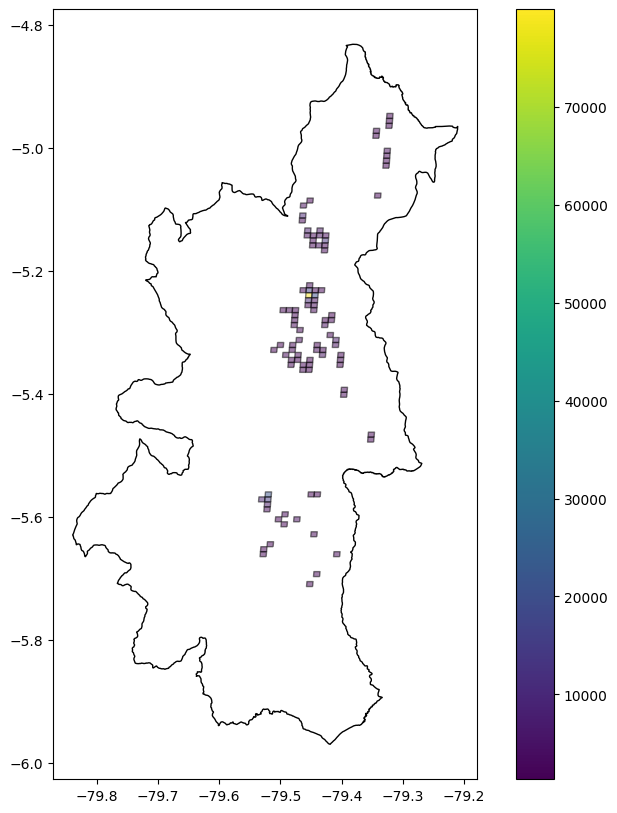

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

huancabamba.plot(ax=ax, facecolor="none", edgecolor="black")
celdas_huancabamba.plot(
    "pop_2020", cmap="viridis", legend=True, ax=ax, alpha=0.5, edgecolor="black"
)

In [54]:
# Schools
schools, metadata = up.download.overpass(
    type_of_data="node",
    mask=huancabamba,
    query={
        "amenity": "school",
    },
)

In [55]:
schools.shape

(453, 7)

<Axes: >

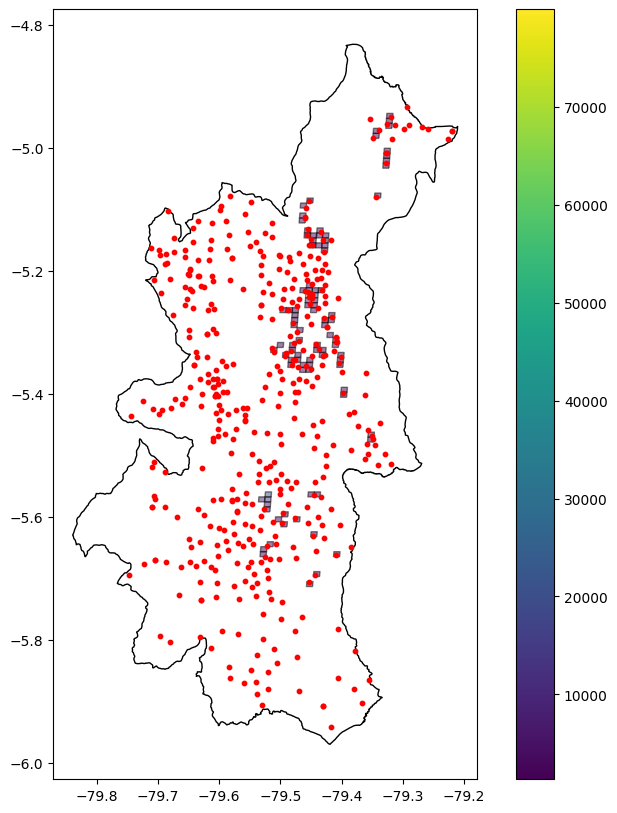

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

huancabamba.plot(ax=ax, facecolor="none", edgecolor="black")
celdas_huancabamba.plot(
    "pop_2020", cmap="viridis", legend=True, ax=ax, alpha=0.5, edgecolor="black"
)
schools.plot(ax=ax, color="red", markersize=10)

# Add a basemap
# ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=huancabamba.crs)

In [1]:
# start server
up.routing.start_osrm_server("peru", "south-america", "foot")

NameError: name 'up' is not defined